In [1091]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date 
from collections import Counter

index = df.index
TOTAL = len(index)

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

path = "./Diaspora of Bosnia-Herzegovina_ Who returned and why_ (Responses).xlsx"

df = pd.read_excel(path, header = None) 

headers=["timestamp","DoB","gender","foreign_country",
          "returned_in_years","reason_for_leaving","edu_lvl_before_leaving",
          "edu_lvl_before_returning","immigrant_status","reason_for_returning",
          "personal_social_reason","children_factor","work_rank_bih",
          "work_rank_foreign","professional_growth","deployment_industry","return_decision",
          "move_back","missing_in_bih","future_in_bih"]

df.columns=headers
df.drop(df.head(2).index, inplace=True)
df.drop("timestamp", axis=1, inplace=True)

#calculating age
today = date.today() 
df['DoB'] = df['DoB'].astype('datetime64[ns]')
df['age'] = today.year- pd.DatetimeIndex(df['DoB']).year     
df.drop('DoB', axis = 1, inplace=True)

#for column in missing_data.columns.values.tolist():
    #print(column)
    #print (missing_data[column].value_counts())
    #print("") 
    
   #filling all missing values with most frequent answ (only 2 now)
df = df.apply(lambda x:x.fillna(x.value_counts().index[0])) 
    
dummy_variable = pd.get_dummies(df["gender"])
dummy_variable.rename(columns={'gender':'male', 'gender':'female'}, inplace=True)
df = pd.concat([df, dummy_variable], axis=1)
#df.drop("gender", axis = 1, inplace=True)

df.gender = pd.Categorical(df.gender,['Male','Female'], ordered=False )
df.gender = df.gender.cat.codes

df.returned_in_years = pd.Categorical(df.returned_in_years,['x','1 year','2 years','3 years','4 years', '5 years','6 years','7 years','8 years','9 years','10 years or more'], ordered=True )
df.returned_in_years = df.returned_in_years.cat.codes

df.edu_lvl_before_leaving = pd.Categorical(df.edu_lvl_before_leaving,['Primary school','High school','Some college','University degree',"Master's of science/arts",'PhD' ], ordered=True )
df.edu_lvl_before_leaving = df.edu_lvl_before_leaving.cat.codes

df.edu_lvl_before_returning = pd.Categorical(df.edu_lvl_before_returning,['Primary school','High school','Some college','University degree',"Master's of science/arts",'PhD' ], ordered=True )
df.edu_lvl_before_returning = df.edu_lvl_before_returning.cat.codes

df.work_rank_bih = pd.Categorical(df.work_rank_bih,['Entry level','Junior management','Middle management','Senior management'], ordered=True )
df.work_rank_bih = df.work_rank_bih.cat.codes

df.work_rank_foreign = pd.Categorical(df.work_rank_foreign,['Entry level','Junior management','Middle management','Senior management'], ordered=True )
df.work_rank_foreign = df.work_rank_foreign.cat.codes

df.professional_growth = pd.Categorical(df.professional_growth,['Much better in the foreign country','Somewhat better in the foreign country','About equal','Somewhat better in Bosnia-Herzegovina','Much better in Bosnia-Herzegovina'], ordered=True )
df.professional_growth = df.professional_growth.cat.codes

df.return_decision = pd.Categorical(df.return_decision,['Very dissatisfied','Somewhat dissatisfied','Neutral','Somewhat satisfied','Very satisfied'], ordered=True )
df.return_decision = df.return_decision.cat.codes

df.move_back = pd.Categorical(df.move_back,['Very unlikely','Somewhat unlikely','Neither likely nor unlikely','Somewhat likely','Very likely'], ordered=True )
df.move_back = df.move_back.cat.codes

df.future_in_bih = pd.Categorical(df.future_in_bih,['Very pessimistic','Somewhat pessimistic','Neutral','Somewhat optimistic','Very optimistic'], ordered=True )
df.future_in_bih = df.future_in_bih.cat.codes

#df.to_csv('clean_df.csv')
plt.style.use('fivethirtyeight')

df.head(50)


,gender,foreign_country,returned_in_years,reason_for_leaving,edu_lvl_before_leaving,edu_lvl_before_returning,immigrant_status,reason_for_returning,personal_social_reason,children_factor,...,work_rank_foreign,professional_growth,deployment_industry,return_decision,move_back,missing_in_bih,future_in_bih,age,Female,Male
2,0,Germany,6,Lack of jobs in Bosnia-Herzegovina when I left,3,3,Student visa,Closeness to family and friends,General quality of life,I did not have the children at the time of ret...,...,1,1,IT/Computer engineering,3,0,Educational and learning opportunities in the ...,3,34,0,1
3,0,United States,3,Educational development,1,5,Student visa,Closeness to family and friends,Family and friends,I did not have the children at the time of ret...,...,0,0,IT/Computer engineering,3,2,A functional government and overall system in ...,3,38,0,1
4,1,United Kingdom,10,Educational development,3,4,Student visa,Closeness to family and friends,Family and friends,I did not have the children at the time of ret...,...,0,2,Educational,3,4,Quality of life in the foreign country,3,1,1,0
5,1,Other,1,The foreign country has better facilities and ...,5,5,Worker visa,Desire to help improve the state of affairs in...,Family and friends,Emotional growth of children,...,1,1,Educational,3,4,High salaries in the foreign country,3,40,1,0
6,1,United Kingdom,3,Educational development,4,4,Citizen,Closeness to family and friends,General quality of life,I did not have the children at the time of ret...,...,1,0,Educational,1,4,A functional government and overall system in ...,1,31,1,0
7,0,Denmark,10,"Unrest (i.e., aggression) in Bosnia-Herzegovina",0,5,Citizen,Lifestyle and quality of life in Bosnia-Herzeg...,General quality of life,I did not have the children at the time of ret...,...,2,0,Educational,3,2,A functional government and overall system in ...,3,42,0,1
8,1,Austria,1,Educational development,1,5,Worker visa,Desire to help improve the state of affairs in...,Family and friends,I did not have the children at the time of ret...,...,0,1,Educational,4,2,A functional government and overall system in ...,3,33,1,0
9,1,United Kingdom,10,Educational development,3,5,Student visa,Desire to help improve the state of affairs in...,Family and friends,I did not have the children at the time of ret...,...,2,0,Educational,4,4,Quality of life in the foreign country,1,40,1,0
10,1,Other,3,The political and societal climate in Bosnia-H...,3,4,Student visa,An attractive job offer in Bosnia-Herzegovina,My reasons for return were not personal/social,I did not have the children at the time of ret...,...,2,0,IT/Computer engineering,4,4,Educational and learning opportunities in the ...,3,35,1,0
11,1,Other,10,"Unrest (i.e., aggression) in Bosnia-Herzegovina",0,0,Some other type of visa,Closeness to family and friends,Family and friends,I did not have the children at the time of ret...,...,0,1,Educational,3,2,Quality of life in the foreign country,1,38,1,0


count    49.000000
mean     39.346939
std       8.387866
min      26.000000
25%      34.000000
50%      38.000000
75%      44.000000
max      65.000000
Name: age, dtype: float64

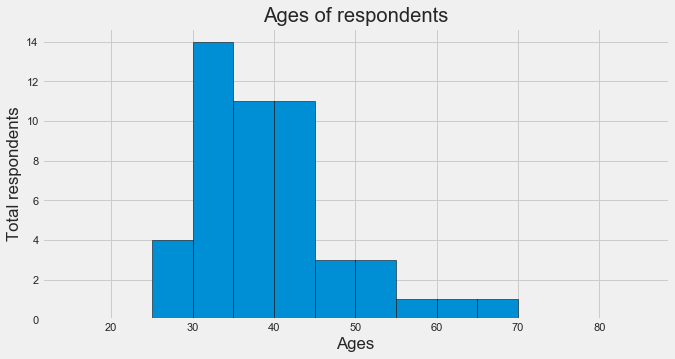

In [1092]:
plt.title('Ages of respondents')
plt.xlabel('Ages')
plt.ylabel('Total respondents')

#droping wrong inputs and replacing them with mean
meanAge = df.age.mean()
df.loc[df['age'] < 15, 'age'] = meanAge
df.age = df['age'].astype(int)

bins=[15,20,25,30,35,40,45,50,55,60,65,70,75,80,85]
        
plt.hist(df['age'], bins=bins, edgecolor='black')
df['age'].describe()





Female   32  |  65 %
Male     17  |  35 %


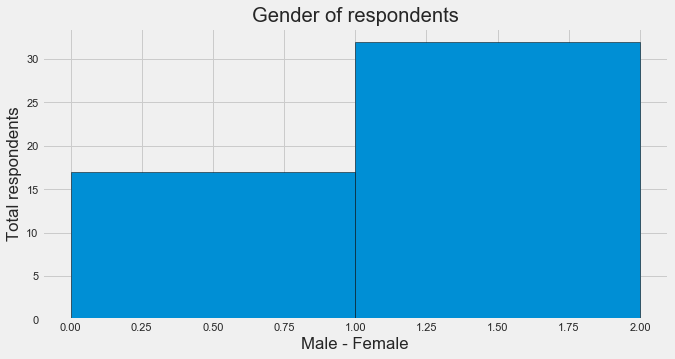

In [1093]:
plt.title('Gender of respondents')
plt.xlabel('Male - Female')
plt.ylabel('Total respondents')

bins=[0,1,2]
plt.hist(df['gender'], bins=bins, edgecolor='black')
df['gender'].value_counts()



for val, cnt in df['gender'].value_counts().iteritems():
    if val == 1:
        print( 'Female  ', cnt, " | " , round(cnt/TOTAL*100),'%' )
    else:
        print( 'Male    ', cnt, " | " , round(cnt/TOTAL*100),'%')        

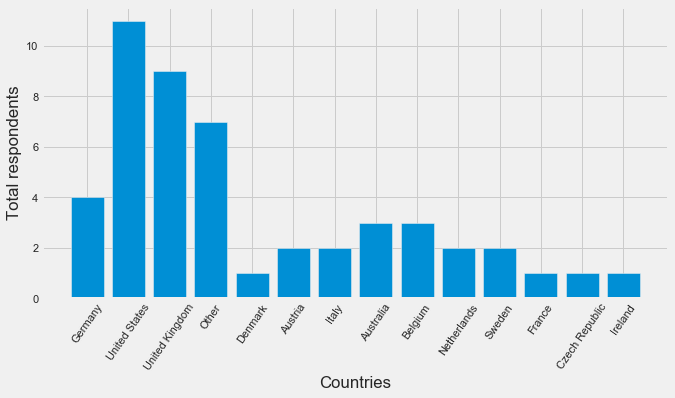

In [1094]:

plt.xlabel('Countries')
plt.ylabel('Total respondents')
freqs = Counter(df['foreign_country'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys(),rotation='55')
plt.show() 




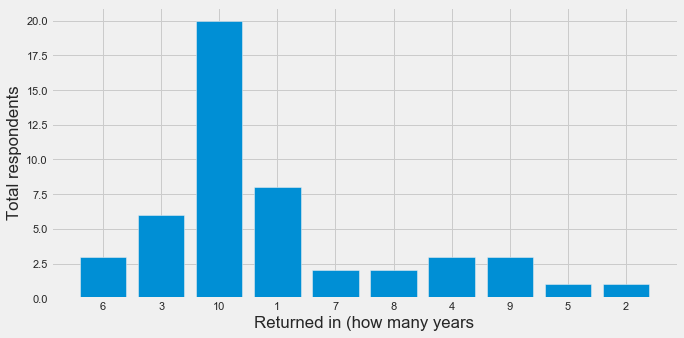

count    49.000000
mean      6.530612
std       3.611913
min       1.000000
25%       3.000000
50%       8.000000
75%      10.000000
max      10.000000
Name: returned_in_years, dtype: float64

In [1095]:
plt.xlabel('Returned in (how many years')
plt.ylabel('Total respondents')
freqs = Counter(df['returned_in_years'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys(),rotation='horizontal')
plt.show() 
df['returned_in_years'].describe()


Educational development                                         55.0
Unrest (i.e., aggression) in Bosnia-Herzegovina                 24.0
Professional development                                         8.0
The political and societal climate in Bosnia-Herzegovina         6.0
The foreign country has better facilities and infrastructure     4.0
Lack of jobs in Bosnia-Herzegovina when I left                   2.0
Name: reason_for_leaving, dtype: float64


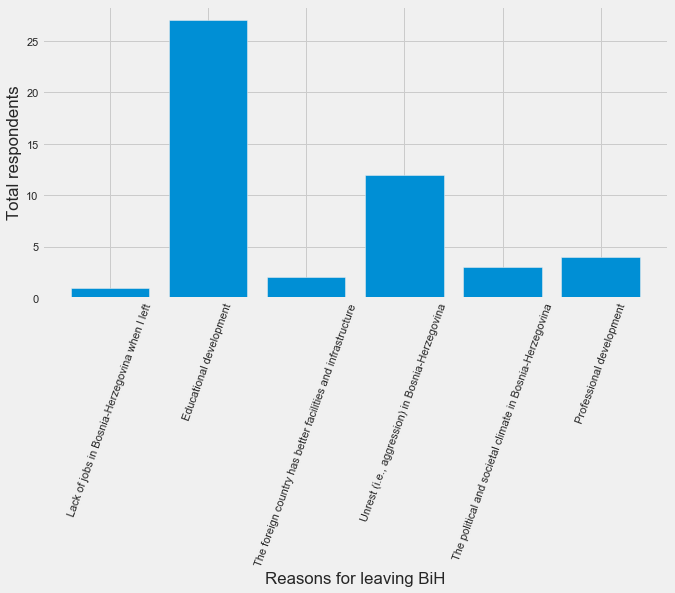

In [1096]:
plt.xlabel('Reasons for leaving BiH')
plt.ylabel('Total respondents')
freqs = Counter(df['reason_for_leaving'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys(),rotation='70' )
print(round(df.reason_for_leaving.value_counts(normalize=True)*100))
plt.show() 



 0 - Primary school
 1 - High school
 2 - Some college
 3 - University degree
 4 - Master's of science/arts
 5 - PhD



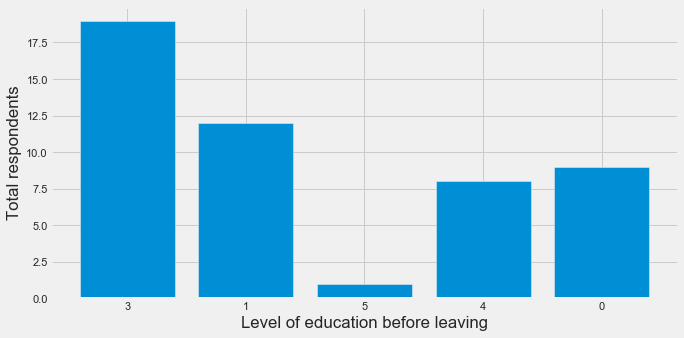

count    49.000000
mean      2.163265
std       1.490902
min       0.000000
25%       1.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: edu_lvl_before_leaving, dtype: float64

In [1097]:
plt.xlabel('Level of education before leaving')
plt.ylabel('Total respondents')
print(" 0 - Primary school\n 1 - High school\n 2 - Some college\n 3 - University degree\n 4 - Master's of science/arts\n 5 - PhD\n")
freqs = Counter(df['edu_lvl_before_leaving'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys())
plt.show() 
df["edu_lvl_before_leaving"].describe()

 0 - Primary school
 1 - High school
 2 - Some college
 3 - University degree
 4 - Master's of science/arts
 5 - PhD



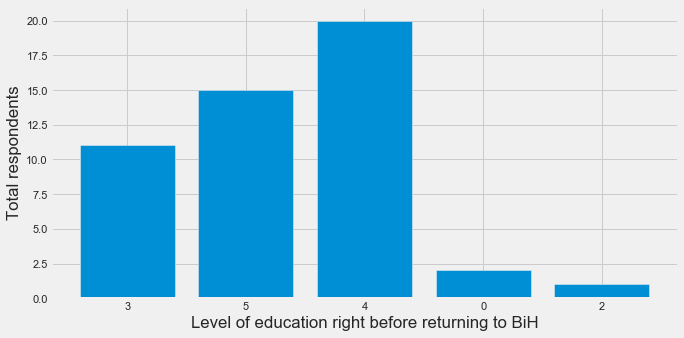

count    49.000000
mean      3.877551
std       1.129761
min       0.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: edu_lvl_before_returning, dtype: float64

In [1098]:
plt.xlabel('Level of education right before returning to BiH')
plt.ylabel('Total respondents')
print(" 0 - Primary school\n 1 - High school\n 2 - Some college\n 3 - University degree\n 4 - Master's of science/arts\n 5 - PhD\n")
freqs = Counter(df['edu_lvl_before_returning'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys())
plt.show() 
df["edu_lvl_before_returning"].describe()


 0 - No difference
 1 - One level
 2 - Two levels
 3 - Three levels
 4 - Four levels
 5 - Five levels



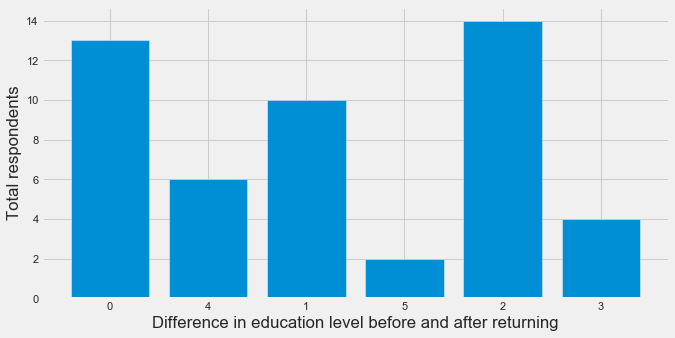

count    49.000000
mean      1.714286
std       1.471960
min       0.000000
25%       0.000000
50%       2.000000
75%       2.000000
max       5.000000
Name: Difference in education level, dtype: float64

In [1099]:
#difference in level of education before and after
df1 = pd.DataFrame(df,columns= ['edu_lvl_before_leaving','edu_lvl_before_returning'])   
df['Difference in education level'] = df1['edu_lvl_before_returning'] - df1['edu_lvl_before_leaving'] 

plt.xlabel('Difference in education level before and after returning')
plt.ylabel('Total respondents')
print(" 0 - No difference\n 1 - One level\n 2 - Two levels\n 3 - Three levels\n 4 - Four levels\n 5 - Five levels\n")
freqs = Counter(df['Difference in education level'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys())
plt.show() 
df["Difference in education level"].describe()



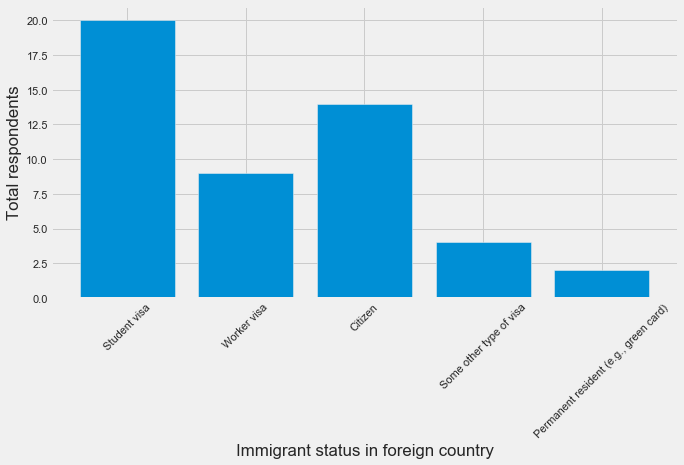

Student visa                             41.0
Citizen                                  29.0
Worker visa                              18.0
Some other type of visa                   8.0
Permanent resident (e.g., green card)     4.0
Name: immigrant_status, dtype: float64


In [1100]:
plt.xlabel('Immigrant status in foreign country')
plt.ylabel('Total respondents')
freqs = Counter(df['immigrant_status'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys(),rotation='45')
plt.show() 
print(round(df.immigrant_status.value_counts(normalize=True)*100))



Percentage of permanent residents and citizen:  33.0 %
Percentage of the rest:  67.0 %


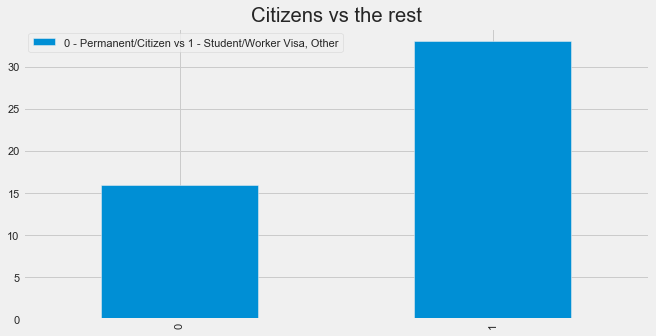

In [1101]:

citizen = df.loc[df.immigrant_status == 'Citizen', 'immigrant_status'].count()
permanent = df.loc[df.immigrant_status == 'Permanent resident (e.g., green card)', 'immigrant_status'].count()
perm_citizen= citizen + permanent

student_visa = df.loc[df.immigrant_status == 'Student visa', 'immigrant_status'].count()
worker_visa = df.loc[df.immigrant_status == 'Worker visa', 'immigrant_status'].count()
other = df.loc[df.immigrant_status == 'Some other type of visa', 'immigrant_status'].count()

rest = student_visa + worker_visa + other


pllt = pd.DataFrame({"0 - Permanent/Citizen vs 1 - Student/Worker Visa, Other": [perm_citizen,rest]})
pllt.plot(kind="bar",title="Citizens vs the rest")

tot = perm_citizen+rest

print("Percentage of permanent residents and citizen: ", round(perm_citizen/tot*100),'%')
print("Percentage of the rest: ", round(rest/tot*100),'%')


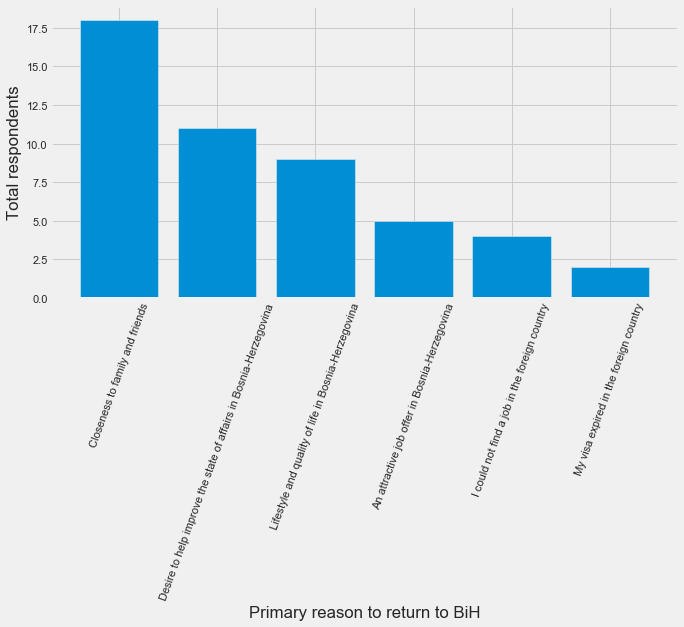

Closeness to family and friends                                      37.0
Desire to help improve the state of affairs in Bosnia-Herzegovina    22.0
Lifestyle and quality of life in Bosnia-Herzegovina                  18.0
An attractive job offer in Bosnia-Herzegovina                        10.0
I could not find a job in the foreign country                         8.0
My visa expired in the foreign country                                4.0
Name: reason_for_returning, dtype: float64


In [1102]:

plt.xlabel('Primary reason to return to BiH')
plt.ylabel('Total respondents')
freqs = Counter(df['reason_for_returning'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys(),rotation='70')
plt.show() 
print(round(df.reason_for_returning.value_counts(normalize=True)*100))


People that had to leave:  4.0 %
People came back for business reasons:  18.0 %
People came back for private reasons:  78.0 %


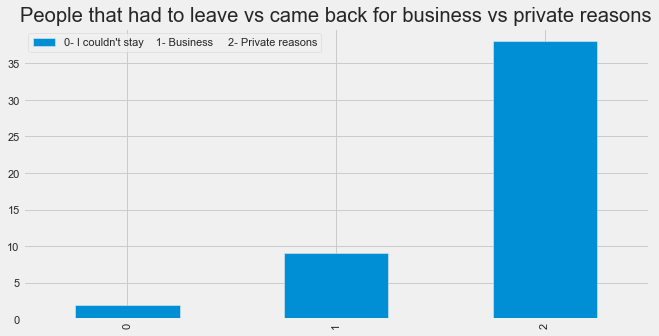

In [1103]:
fam_friends = df.loc[df.reason_for_returning == 'Closeness to family and friends', 'reason_for_returning'].count()
help_improve = df.loc[df.reason_for_returning == 'Desire to help improve the state of affairs in Bosnia-Herzegovina', 'reason_for_returning'].count()
lifestyle = df.loc[df.reason_for_returning == 'Lifestyle and quality of life in Bosnia-Herzegovina', 'reason_for_returning'].count()
job_offer = df.loc[df.reason_for_returning == 'An attractive job offer in Bosnia-Herzegovina', 'reason_for_returning'].count()
no_job = df.loc[df.reason_for_returning == 'I could not find a job in the foreign country', 'reason_for_returning'].count()
visa_expired = df.loc[df.reason_for_returning == 'My visa expired in the foreign country', 'reason_for_returning'].count()

must = visa_expired
work = job_offer + no_job 
private = fam_friends + lifestyle+ help_improve

pllt = pd.DataFrame({"0- I couldn't stay    1- Business     2- Private reasons": [must,work,private]})
pllt.plot(kind="bar",title="People that had to leave vs came back for business vs private reasons")

tot = must+work+private

print("People that had to leave: ", round(must/tot*100),'%')
print("People came back for business reasons: ", round(work/tot*100),'%')
print("People came back for private reasons: ", round(private/tot*100),'%')

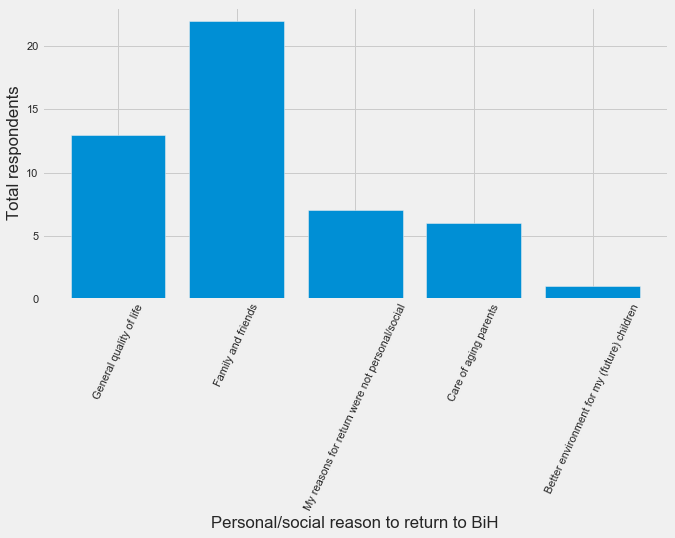

Family and friends                                45.0
General quality of life                           27.0
My reasons for return were not personal/social    14.0
Care of aging parents                             12.0
Better environment for my (future) children        2.0
Name: personal_social_reason, dtype: float64


In [1104]:
plt.xlabel('Personal/social reason to return to BiH')
plt.ylabel('Total respondents')
freqs = Counter(df['personal_social_reason'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys(),rotation='65')
plt.show() 
print(round(df.personal_social_reason.value_counts(normalize=True)*100))



Personal reason for returning is family/friends:  63.0 %
Personal reason for returning is life quality:  37.0 %


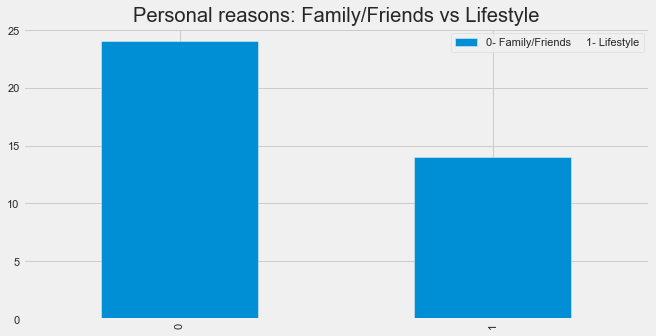

In [1105]:
fam_friends = df.loc[df.reason_for_returning == 'Closeness to family and friends', 'reason_for_returning'].count()
fam_fr = df.loc[df.personal_social_reason == 'Family and friends', 'personal_social_reason'].count()
life_quality = df.loc[df.personal_social_reason == 'General quality of life', 'personal_social_reason'].count()
not_pers = df.loc[df.personal_social_reason == 'My reasons for return were not personal/social', 'personal_social_reason'].count()
aging_par = df.loc[df.personal_social_reason == 'Care of aging parents', 'personal_social_reason'].count()
envir = df.loc[df.personal_social_reason == 'Better environment for my (future) children', 'personal_social_reason'].count()

fam= fam_friends + aging_par 
lifest= life_quality + envir

pllt = pd.DataFrame({"0- Family/Friends     1- Lifestyle": [fam,lifest]})
pllt.plot(kind="bar",title="Personal reasons: Family/Friends vs Lifestyle")

tot = fam_friends + aging_par+life_quality + envir

print("Personal reason for returning is family/friends: ", round(fam/tot*100),'%')
print("Personal reason for returning is life quality: ", round(lifest/tot*100),'%')


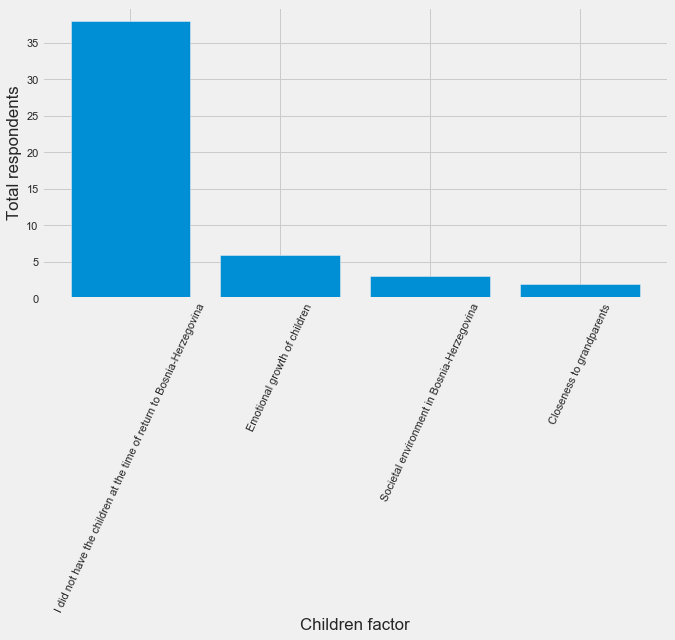

I did not have the children at the time of return to Bosnia-Herzegovina    78.0
Emotional growth of children                                               12.0
Societal environment in Bosnia-Herzegovina                                  6.0
Closeness to grandparents                                                   4.0
Name: children_factor, dtype: float64


In [1106]:
plt.xlabel('Children factor')
plt.ylabel('Total respondents')
freqs = Counter(df['children_factor'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys(),rotation='65')
plt.show() 
print(round(df.children_factor.value_counts(normalize=True)*100))

 0 - Entry level
 1 - Junior management
 2 - Middle management
 3 - Senior management
 


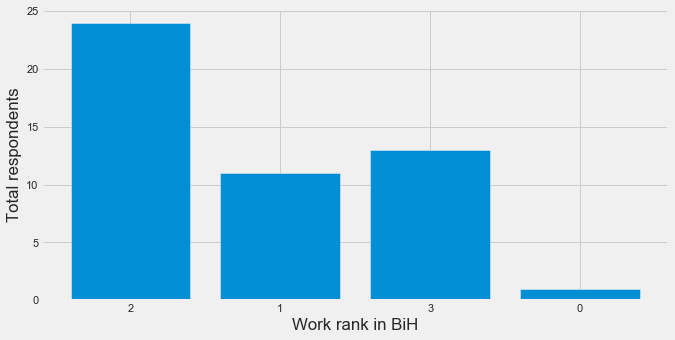

count    49.000000
mean      2.000000
std       0.763763
min       0.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: work_rank_bih, dtype: float64

In [1107]:
plt.xlabel('Work rank in BiH')
plt.ylabel('Total respondents')
print(" 0 - Entry level\n 1 - Junior management\n 2 - Middle management\n 3 - Senior management\n ")
freqs = Counter(df['work_rank_bih'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys())
plt.show() 
df['work_rank_bih'].describe()

 0 - Entry level
 1 - Junior management
 2 - Middle management
 3 - Senior management
 


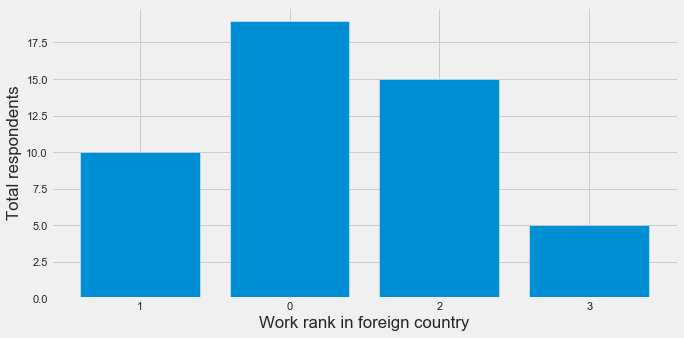

count    49.000000
mean      1.122449
std       1.053420
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: work_rank_foreign, dtype: float64

In [1108]:
plt.xlabel('Work rank in foreign country')
plt.ylabel('Total respondents')
print(" 0 - Entry level\n 1 - Junior management\n 2 - Middle management\n 3 - Senior management\n ")
freqs = Counter(df['work_rank_foreign'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys())
plt.show() 
df['work_rank_foreign'].describe()



(-) Foreign country work rank higher in (levels)
(0) No difference
(+) Work rank in BiH higher in (levels)



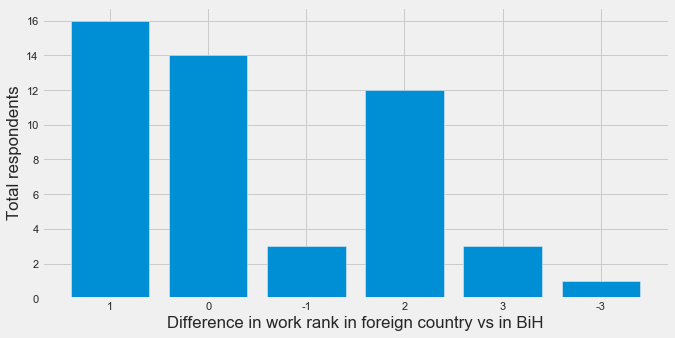

In [1109]:
#difference in work rank 
df2 = pd.DataFrame(df,columns= ['work_rank_foreign','work_rank_bih'])   
df['work_rank_difference'] = df2['work_rank_bih'] - df2['work_rank_foreign'] 

plt.xlabel('Difference in work rank in foreign country vs in BiH')
plt.ylabel('Total respondents')
print("(-) Foreign country work rank higher in (levels)\n(0) No difference\n(+) Work rank in BiH higher in (levels)\n")
freqs = Counter(df['work_rank_difference'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys())
plt.show() 



In [1110]:

#percantage of people with higher positions in BiH
one = df.loc[df.work_rank_difference == 1, 'work_rank_difference'].count()
two = df.loc[df.work_rank_difference == 2, 'work_rank_difference'].count()
three = df.loc[df.work_rank_difference == 3, 'work_rank_difference'].count()
higher_in_bih=one+two+three
tot = df['work_rank_difference'].count()
print("People with higher work rank in BiH: ", round(higher_in_bih/tot*100),'%')
df["work_rank_difference"].describe()


People with higher work rank in BiH:  63.0 %


count    49.000000
mean      0.877551
std       1.166059
min      -3.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: work_rank_difference, dtype: float64

 0 - Much better in the foreign country
 1 - Somewhat better in the foreign country
 2 - About equal
 3 - Somewhat better in Bosnia-Herzegovina
 4 - Much better in Bosnia-Herzegovina
 


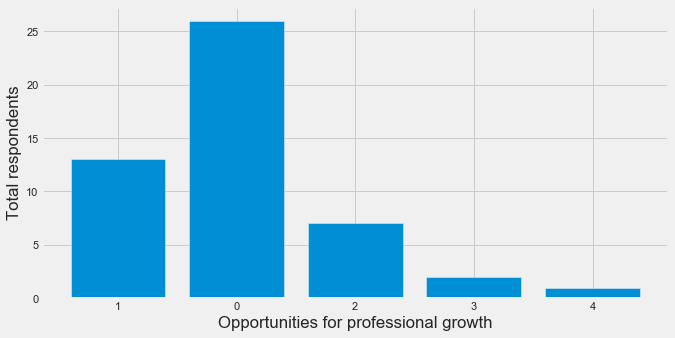

count    49.000000
mean      0.755102
std       0.990173
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       4.000000
Name: professional_growth, dtype: float64

In [1111]:
plt.xlabel('Opportunities for professional growth')
plt.ylabel('Total respondents')
print(" 0 - Much better in the foreign country\n 1 - Somewhat better in the foreign country\n 2 - About equal\n 3 - Somewhat better in Bosnia-Herzegovina\n 4 - Much better in Bosnia-Herzegovina\n ")
freqs = Counter(df['professional_growth'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys())
plt.show() 
df['professional_growth'].describe()

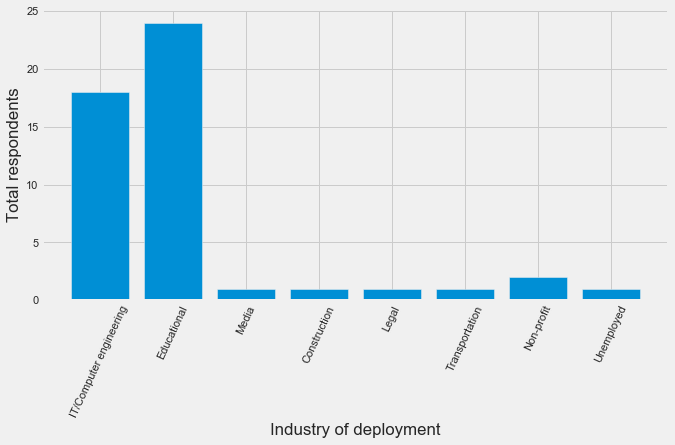

Educational                49.0
IT/Computer engineering    37.0
Non-profit                  4.0
Legal                       2.0
Unemployed                  2.0
Media                       2.0
Construction                2.0
Transportation              2.0
Name: deployment_industry, dtype: float64


In [1112]:

plt.xlabel('Industry of deployment')
plt.ylabel('Total respondents')
freqs = Counter(df['deployment_industry'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys(),rotation='65')
plt.show() 
print(round(df.deployment_industry.value_counts(normalize=True)*100))

 0 - Very dissatisfied
 1 - Somewhat dissatisfied
 2 - Neutral
 3 - Somewhat satisfied
 4 - Very satisfied
 


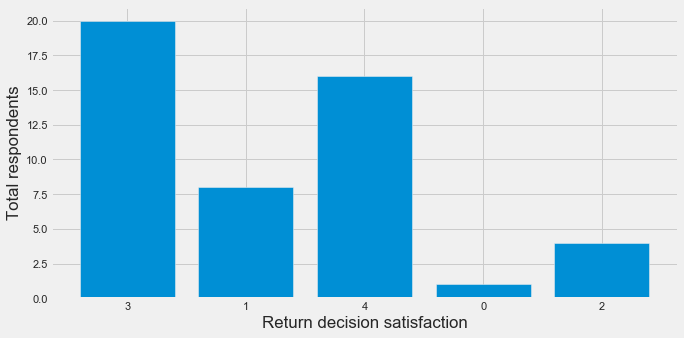

count    49.000000
mean      2.857143
std       1.118034
min       0.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       4.000000
Name: return_decision, dtype: float64

In [1113]:
plt.xlabel('Return decision satisfaction')
plt.ylabel('Total respondents')
print(" 0 - Very dissatisfied\n 1 - Somewhat dissatisfied\n 2 - Neutral\n 3 - Somewhat satisfied\n 4 - Very satisfied\n ")
freqs = Counter(df['return_decision'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys())
plt.show() 
df['return_decision'].describe()


 0 - Very unlikely
 1 - Somewhat unlikely
 2 - Neither likely nor unlikely
 3 - Somewhat likely
 4 - Very likely
 


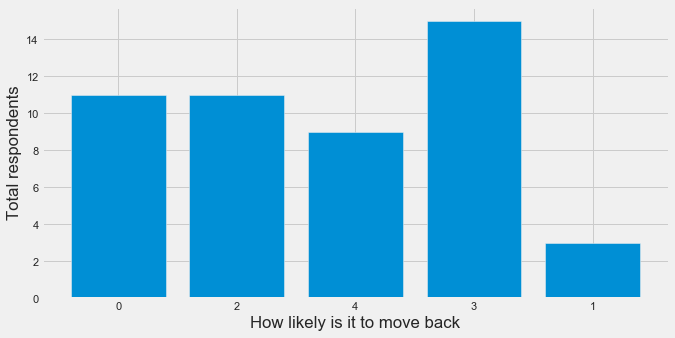

count    49.000000
mean      2.163265
std       1.419315
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: move_back, dtype: float64

In [1114]:
plt.xlabel('How likely is it to move back')
plt.ylabel('Total respondents')
print(" 0 - Very unlikely\n 1 - Somewhat unlikely\n 2 - Neither likely nor unlikely\n 3 - Somewhat likely\n 4 - Very likely\n ")
freqs = Counter(df['move_back'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys())
plt.show() 
df['move_back'].describe()



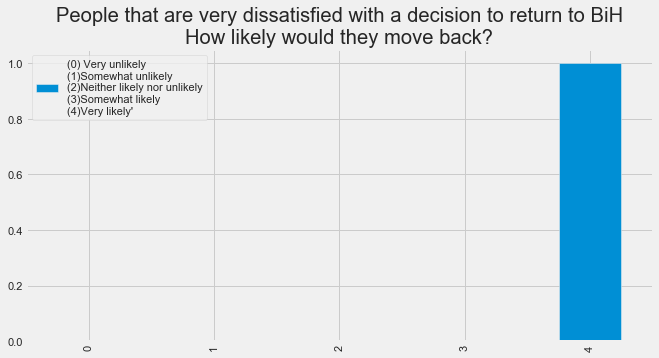

In [1115]:
#connection between return decision satisfaction and how likely would they move again
df4 = pd.DataFrame(df,columns= ['return_decision','move_back']) 


indexNames = df4[ df4['return_decision'] != 0 ].index
df4.drop(indexNames , inplace=True)

zero = df4.loc[df.move_back == 0, 'move_back'].count()
one = df4.loc[df.move_back == 1, 'move_back'].count()
two = df4.loc[df.move_back == 2, 'move_back'].count()
three = df4.loc[df.move_back == 3, 'move_back'].count()
four = df4.loc[df.move_back == 4, 'move_back'].count()

pllt = pd.DataFrame({"(0) Very unlikely\n(1)Somewhat unlikely\n(2)Neither likely nor unlikely\n(3)Somewhat likely\n(4)Very likely'": [zero,one,two,three,four]})
pllt.plot(kind="bar",title="People that are very dissatisfied with a decision to return to BiH\nHow likely would they move back?")



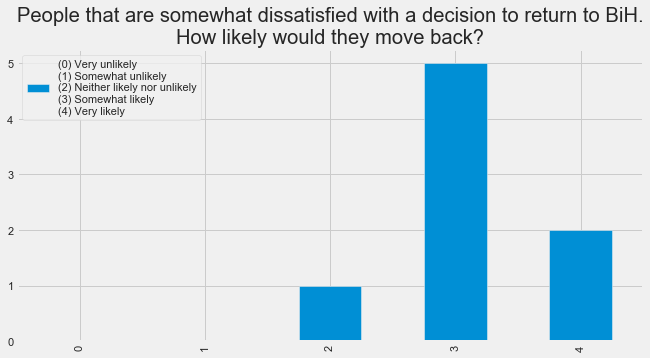

In [1116]:
#connection between return decision satisfaction and how likely would they move again
df5 = pd.DataFrame(df,columns= ['return_decision','move_back']) 


indexNames = df5[ df5['return_decision'] != 1 ].index
df5.drop(indexNames , inplace=True)

zero = df5.loc[df.move_back == 0, 'move_back'].count()
one = df5.loc[df.move_back == 1, 'move_back'].count()
two = df5.loc[df.move_back == 2, 'move_back'].count()
three = df5.loc[df.move_back == 3, 'move_back'].count()
four = df5.loc[df.move_back == 4, 'move_back'].count()

pllt = pd.DataFrame({"(0) Very unlikely\n(1) Somewhat unlikely\n(2) Neither likely nor unlikely\n(3) Somewhat likely\n(4) Very likely": [zero,one,two,three,four]})
pllt.plot(kind="bar",title="People that are somewhat dissatisfied with a decision to return to BiH.\nHow likely would they move back?")


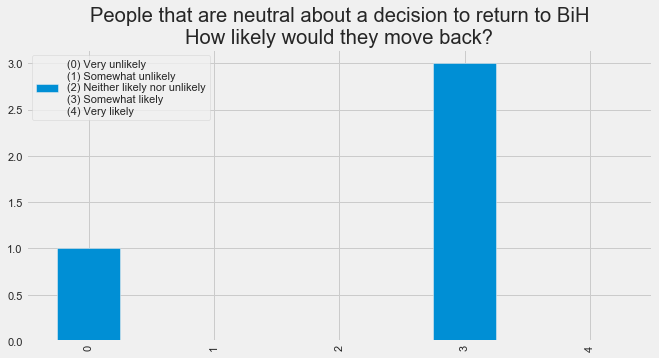

In [1117]:
#connection between return decision satisfaction and how likely would they move again
df6 = pd.DataFrame(df,columns= ['return_decision','move_back']) 


indexNames = df6[ df6['return_decision'] != 2 ].index
df6.drop(indexNames , inplace=True)

zero = df6.loc[df.move_back == 0, 'move_back'].count()
one = df6.loc[df.move_back == 1, 'move_back'].count()
two = df6.loc[df.move_back == 2, 'move_back'].count()
three = df6.loc[df.move_back == 3, 'move_back'].count()
four = df6.loc[df.move_back == 4, 'move_back'].count()

pllt = pd.DataFrame({"(0) Very unlikely\n(1) Somewhat unlikely\n(2) Neither likely nor unlikely\n(3) Somewhat likely\n(4) Very likely": [zero,one,two,three,four]})
pllt.plot(kind="bar",title="People that are neutral about a decision to return to BiH\nHow likely would they move back?")


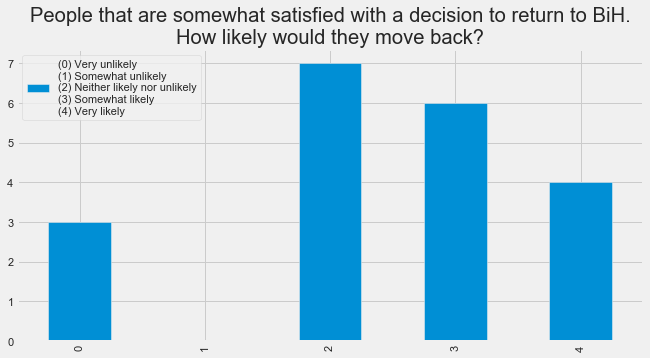

In [1118]:
#connection between return decision satisfaction and how likely would they move again
df5 = pd.DataFrame(df,columns= ['return_decision','move_back']) 

indexNames = df5[ df5['return_decision'] != 3 ].index
df5.drop(indexNames , inplace=True)

zero = df5.loc[df.move_back == 0, 'move_back'].count()
one = df5.loc[df.move_back == 1, 'move_back'].count()
two = df5.loc[df.move_back == 2, 'move_back'].count()
three = df5.loc[df.move_back == 3, 'move_back'].count()
four = df5.loc[df.move_back == 4, 'move_back'].count()

pllt = pd.DataFrame({"(0) Very unlikely\n(1) Somewhat unlikely\n(2) Neither likely nor unlikely\n(3) Somewhat likely\n(4) Very likely": [zero,one,two,three,four]})
pllt.plot(kind="bar",title="People that are somewhat satisfied with a decision to return to BiH.\nHow likely would they move back?")


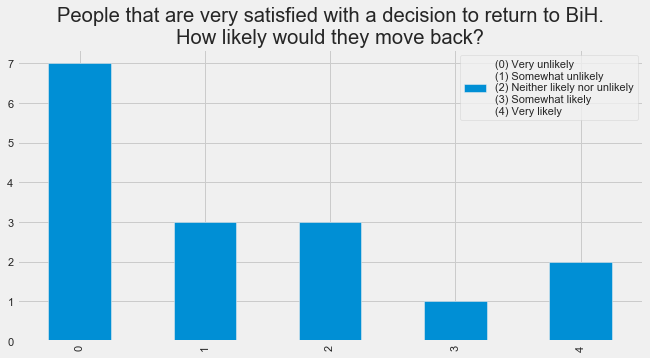

In [1119]:
#connection between return decision satisfaction and how likely would they move again
df5 = pd.DataFrame(df,columns= ['return_decision','move_back']) 

indexNames = df5[ df5['return_decision'] != 4 ].index
df5.drop(indexNames , inplace=True)

zero = df5.loc[df.move_back == 0, 'move_back'].count()
one = df5.loc[df.move_back == 1, 'move_back'].count()
two = df5.loc[df.move_back == 2, 'move_back'].count()
three = df5.loc[df.move_back == 3, 'move_back'].count()
four = df5.loc[df.move_back == 4, 'move_back'].count()

pllt = pd.DataFrame({"(0) Very unlikely\n(1) Somewhat unlikely\n(2) Neither likely nor unlikely\n(3) Somewhat likely\n(4) Very likely": [zero,one,two,three,four]})
pllt.plot(kind="bar",title="People that are very satisfied with a decision to return to BiH.\nHow likely would they move back?")


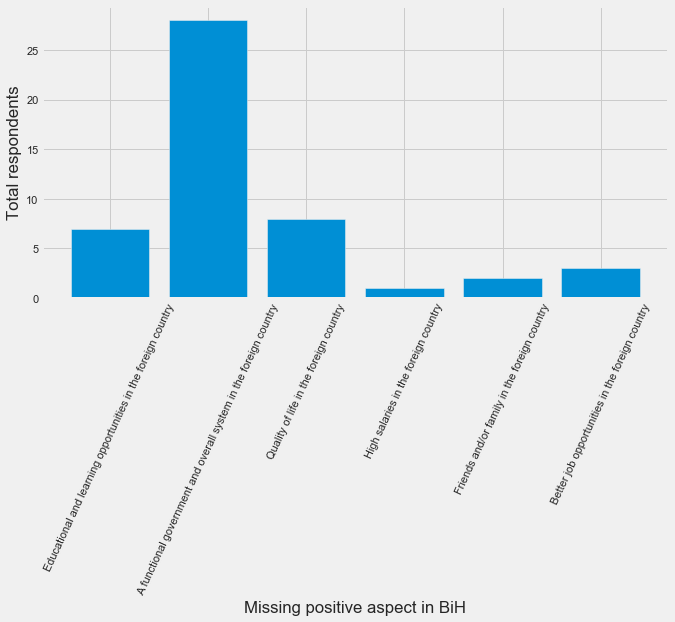

A functional government and overall system in the foreign country    57.0
Quality of life in the foreign country                               16.0
Educational and learning opportunities in the foreign country        14.0
Better job opportunities in the foreign country                       6.0
Friends and/or family in the foreign country                          4.0
High salaries in the foreign country                                  2.0
Name: missing_in_bih, dtype: float64


In [1120]:
plt.xlabel('Missing positive aspect in BiH')
plt.ylabel('Total respondents')
freqs = Counter(df['missing_in_bih'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys(),rotation='65')
plt.show() 
print(round(df.missing_in_bih.value_counts(normalize=True)*100))


 0 - Very pessimistic
 1 - Somewhat pessimistic
 2 - Neutral
 3 - Somewhat optimistic
 4 - Very optimistic
 


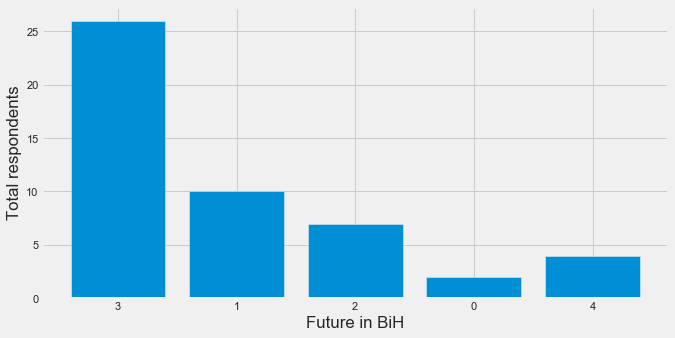

count    49.000000
mean      0.755102
std       0.990173
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       4.000000
Name: professional_growth, dtype: float64

In [1121]:
plt.xlabel('Future in BiH')
plt.ylabel('Total respondents')
print(" 0 - Very pessimistic\n 1 - Somewhat pessimistic\n 2 - Neutral\n 3 - Somewhat optimistic\n 4 - Very optimistic\n ")
freqs = Counter(df['future_in_bih'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys())
plt.show()
 
df['professional_growth'].describe()